<a href="https://colab.research.google.com/github/Lakshayakanna123/Decision_tree/blob/main/cardecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving car_data.csv to car_data.csv


In [ ]:
data = pd.read_csv('car_data.csv')
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [ ]:
x = data.drop('Purchased', axis=1)
y = data['Purchased']

<Axes: xlabel='Purchased', ylabel='Gender'>

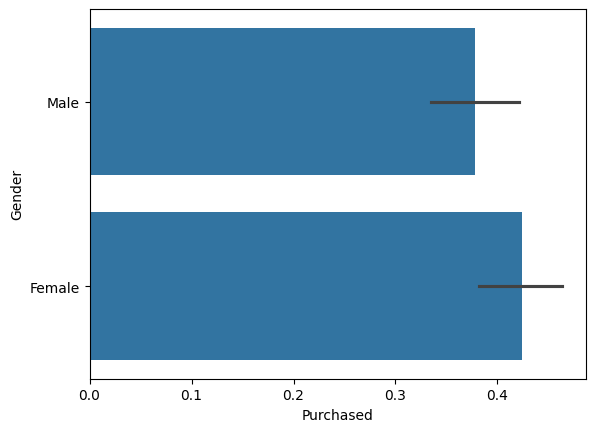

In [ ]:
sns.barplot(x='Purchased',y='Gender',data=data)

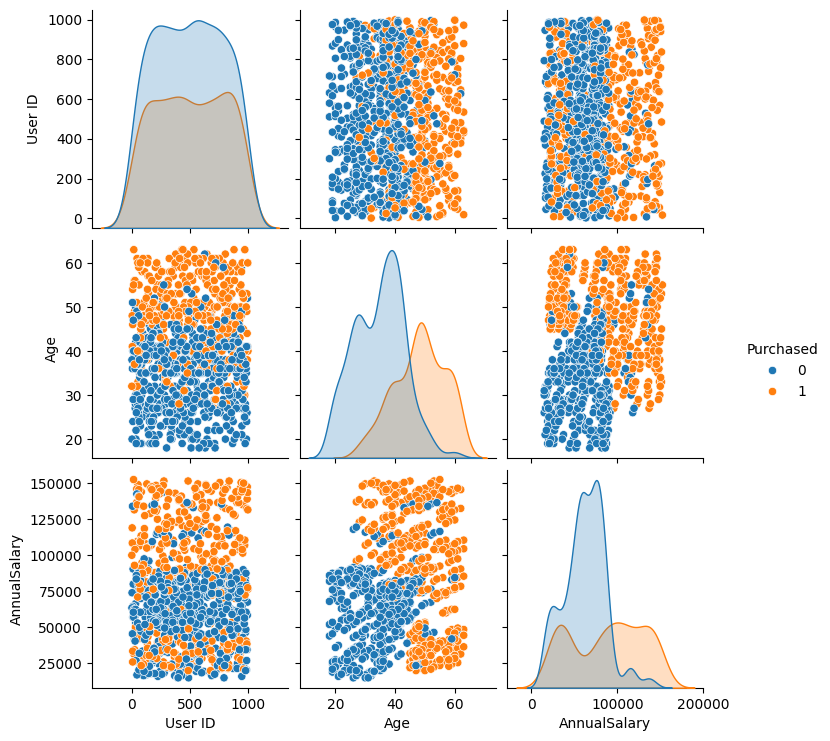

In [ ]:
sns.pairplot(data,hue='Purchased')

In [ ]:
x.head()

,User ID,Gender,Age,AnnualSalary
0,385,Male,35,20000
1,681,Male,40,43500
2,353,Male,49,74000
3,895,Male,40,107500
4,661,Male,25,79000


In [ ]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=100)

preprocessing for string to numerical classification

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate over columns in X_train and encode string columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if column is of object type (likely string)
        X_train[col] = le.fit_transform(X_train[col])

# Do the same for X_test (using the same encoder to ensure consistency)
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = le.transform(X_test[col])

# Now fit the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction=dtree.predict(X_test)
prediction

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.83      0.86      0.84       121

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
print(confusion_matrix(y_test,dtree.predict(X_test)))

[[157  22]
 [ 17 104]]
